In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import os
from itertools import cycle
import mylibrary as m
import os

# Plot gragh for the results per class

In [2]:
data_root='.\\Data\\'
dbname="train.db"
m.initialize_parameteres(data_root_=data_root,dbname=dbname)

Database Opened successfully


In [3]:
k=1000
n=0
m.gray=0
m.bow_encoding=0
sift=m.Algorithm('SIFT',k=k,n=n)

In [ ]:
cat_sift=m.load_categories_from_file('.//images//1000//sift0')
for c in cat_sift:
    c.X_train=[]
    c.train_classifier(sift)



Building PCA...
Training Classifier...
Classifier Trained
Building PCA...
Training Classifier...
Classifier Trained
Building PCA...
Training Classifier...


In [ ]:
m.graph=1
m.localizer=1
m.window_size_factor=1
m.window_overlapping_factor=0
m.accuracy=0.85
m.epsilon=0.05
m.min_pts_per_cluster=1
m.reduced=0.2

m.test(cat_sift,sift)

In [15]:
sift_dir='SIFT_PCA256_BOW1000_ALLData_Color_Hard_localizer1_skCluster_reduced0.2_20160906_141159_accuracy_0.85_coding_0'
y_score=dict()
y_test=dict()

n=['airplane','airport','car']
for i,name in zip(range(3),n):
    file=open(os.path.join('.//data//ops_out//' , sift_dir , name+'_y_scores.dat'),'rb')
    y_score[i]=pickle.load(file)
    file.close()
    file=open(os.path.join('.//data//ops_out//' , sift_dir , name+'_y_test.dat'),'rb')
    y_test[i]=pickle.load(file)

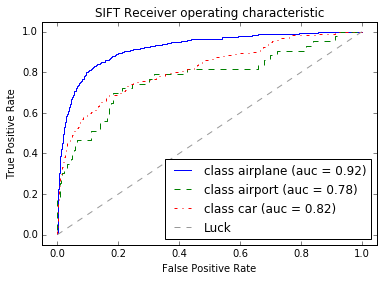

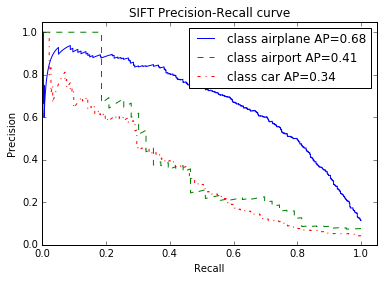

In [17]:
out_dir='.//images'
c = cycle('bgrcv')
ls = cycle(['-', '--', '-.', ':','-'])

for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test[i].ravel(), y_score[i].ravel())
    roc_auc = auc(fpr, tpr) 
    plt.plot(fpr, tpr, lw=1,linestyle=next(ls), label='class %s (auc = %0.2f)' % (n[i],roc_auc,))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SIFT Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(os.path.join(out_dir,'meanshift_per_class_comparison_SIFT_acc_85_roc.png'))

plt.show()

c = cycle('bgrcv')
ls = cycle(['-', '--', '-.', ':','-'])
plt.clf()
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test[i].ravel(), y_score[i].ravel())
    average_precision = average_precision_score(y_test[i],y_score[i], average="micro")

    plt.plot(recall, precision,linestyle=next(ls),  label='class {0} AP={1:0.2f}'.format(n[i],average_precision,))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0, 1.05])
plt.title('SIFT Precision-Recall curve')
plt.legend(loc="upper right")
plt.savefig(os.path.join(out_dir,'meanshift_per_class_comparison_acc_SIFT_85_pr.png'))

plt.show()


In [1]:
import mylibrary as m
import os
data_root='.\\Data\\'
dbname="train.db"
m.initialize_parameteres(data_root_=data_root,dbname=dbname)

k=1000
n=256
m.gray=0
m.bow_encoding=0
surf=m.Algorithm('SURF',k=k,n=n)

cat_surf=m.load_categories_from_file('.//images//1000//surf0')
for c in cat_surf:
    c.X_train=[]
    c.train_classifier(surf)

m.graph=1
m.localizer=1
m.window_size_factor=1
m.window_overlapping_factor=0
m.accuracy=0.85
m.epsilon=0.05
m.min_pts_per_cluster=1
m.reduced=0.2

m.test(cat_surf,surf)

Database Opened successfully
Building PCA...
Training Classifier...
Classifier Trained
Building PCA...
Training Classifier...
Classifier Trained
Building PCA...
Training Classifier...
Classifier Trained
Testing with detector=SURF, gray=0, vocab=1000, pca with n=256, localizer = 1 
, Usin Coding: 0 Data reduced with k=0.2
Start Testing tile 1/49 : .\Data\Testing\airplane\10019.tif
Clustering Composite features...
good matches = 519
Using Mean Shift to Localize Targets...
Score = 0.943089430894
AUC = 0.916666666667
average precision = 0.795107845389
Precision : 1.0
recall : 0.4166666666666667
True Positives: 5
False Positives: 0
False Negatives:7
False Echo:0
Detected Objects all:  123
Filtered Detected Objects:  5
True Objects:  12
Start Testing tile 2/49 : .\Data\Testing\airplane\10020.tif
good matches = 998
Using Mean Shift to Localize Targets...
Score = 0.969465648855
AUC = 0.981707317073
average precision = 0.833623238969
Precision : 1.0
recall : 0.5
True Positives: 4
False Positive

C:\Users\mfrd\Anaconda3\lib\site-packages\sklearn\cluster\mean_shift_.py:275: UserWarning: Binning data failed with provided bin_size=41.500000, using data points as seeds.
  " using data points as seeds." % bin_size)


Score = 0.666666666667
AUC = 1.0
average precision = 1.0
Precision : 0
recall : 0
True Positives: 0
False Positives: 0
False Negatives:1
False Echo:0
Detected Objects all:  3
Filtered Detected Objects:  0
True Objects:  1
Start Testing tile 45/47 : .\Data\Testing\airport\airport_91_B70.tif
good matches = 160
Using Mean Shift to Localize Targets...
Score = 0.962962962963
AUC = 0.576923076923
average precision = 0.0416666666667
Precision : 0
recall : 0
True Positives: 0
False Positives: 0
False Negatives:1
False Echo:0
Detected Objects all:  27
Filtered Detected Objects:  0
True Objects:  1
Start Testing tile 46/47 : .\Data\Testing\airport\airport_94_B70.tif
good matches = 175
Using Mean Shift to Localize Targets...
Score = 0.958333333333
AUC = 0.652173913043
average precision = 0.0555555555556
Precision : 0
recall : 0
True Positives: 0
False Positives: 0
False Negatives:1
False Echo:0
Detected Objects all:  24
Filtered Detected Objects:  0
True Objects:  1
Start Testing tile 47/47 : .\D

In [10]:
surf_dir='SURF_PCA256_BOW1000_ALLData_Color_Hard_localizer1_skCluster_reduced0.2_20160906_135131_accuracy_0.85_coding_0'
out_dir='.//images'
y_score=dict()
y_test=dict()

n=['airplane','airport','car']
for i,name in zip(range(3),n):
    file=open(os.path.join('.//data//ops_out//' , surf_dir , name+'_y_scores.dat'),'rb')
    y_score[i]=pickle.load(file)
    file.close()
    file=open(os.path.join('.//data//ops_out//' , surf_dir , name+'_y_test.dat'),'rb')
    y_test[i]=pickle.load(file)


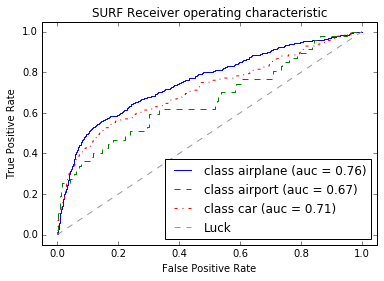

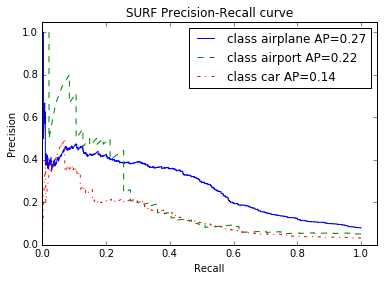

In [11]:
c = cycle('bgrcv')
ls = cycle(['-', '--', '-.', ':','-'])

for i in range(3):
    fpr, tpr, thresholds = roc_curve(y_test[i].ravel(), y_score[i].ravel())
    roc_auc = auc(fpr, tpr) 
    plt.plot(fpr, tpr, lw=1,linestyle=next(ls), label='class %s (auc = %0.2f)' % (n[i],roc_auc,))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SURF Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig(os.path.join(out_dir,'meanshift_per_class_comparison_SURF_acc_85_roc.png'))

plt.show()

c = cycle('bgrcv')
ls = cycle(['-', '--', '-.', ':','-'])
plt.clf()
for i in range(3):
    precision, recall, _ = precision_recall_curve(y_test[i].ravel(), y_score[i].ravel())
    average_precision = average_precision_score(y_test[i],y_score[i], average="micro")

    plt.plot(recall, precision,linestyle=next(ls),  label='class {0} AP={1:0.2f}'.format(n[i],average_precision,))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0,1.05])
plt.xlim([0.0, 1.05])
plt.title('SURF Precision-Recall curve')
plt.legend(loc="upper right")
plt.savefig(os.path.join(out_dir,'meanshift_per_class_comparison_SURF_acc_85_pr.png'))

plt.show()
